# [E-05] RockScissorPaper

- 목차
    - **00. import and define function**
    - **01. Data 준비하기**
    - **02. Model 설계**
    - **03. Model 학습**
    - **04. Model 평가**
    - **05. 회고**

 일반적으로 딥러닝 기술은 "데이터 준비 → 딥러닝 네트워크 설계 → 학습 → 테스트(평가)"의 순서대로 만들게 됩니다.

 가위바위보 분류기는 이미지를 입력으로 받으면, 그 이미지가 어떤 모양을 나타내는지 출력해 낼 수 있습니다.

 딥러닝 기술을 이용해서 가위바위보 분류기를 만드는 실습입니다.

## 00. import and define function

In [1]:
from PIL import Image # python Image 처리할 때 사용
import glob # glob는 파일들의 리스트를 뽑을 때 사용
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


'''원본 image size 조정 28*28 size로 변경해준다.'''
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg") # 해당 path에서 jpg로된 file을 list로 변환
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS) # ANTIALIAS는 위신호 제거로 깨짐 최소화
        new_img.save(img, "JPEG") # img를 jpeg형태로 저장합니다.
    
    print(len(images), " images resized." + " in " + img_path)


'''data 준비하기 사용할 img data를 만들어주고 가위바위보를 각각 0,1,2에 labeling을 하여준다.'''
def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels

## 01. Data 준비하기

In [2]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

# data와 label을 나눈 후 정규화
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path,1200)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

# train data set의 shape 확인
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

400  images to be resized.
400  images resized. in /aiffel/aiffel/rock_scissor_paper/scissor
400  images to be resized.
400  images resized. in /aiffel/aiffel/rock_scissor_paper/rock
400  images to be resized.
400  images resized. in /aiffel/aiffel/rock_scissor_paper/paper
데이터의 이미지 개수는 1200 입니다.
x_train shape: (1200, 28, 28, 3)
y_train shape: (1200,)


**-> 1200개의 img data가 28X28X3형태로 잘나왔고 label또한 series로 1200개의 형태인 것을 확인할 수 있다.**

In [3]:
# data resizing
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

# data와 label을 나눈 후 정규화
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path,300)
x_test_norm = x_test/255.0

# test data set의 shape 확인
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized. in /aiffel/aiffel/rock_scissor_paper/test/scissor
100  images to be resized.
100  images resized. in /aiffel/aiffel/rock_scissor_paper/test/rock
100  images to be resized.
100  images resized. in /aiffel/aiffel/rock_scissor_paper/test/paper
데이터의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


**-> 300개의 img data가 28X28X3형태로 잘나왔고 label또한 series로 300개의 형태인 것을 확인할 수 있다.**

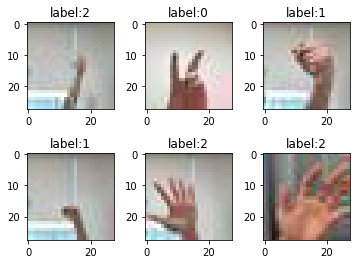

In [31]:
import random

# trainset의 data와 label이 잘 match가 되었나 확인
for i in range(1,7):
    plt.subplot(2, 3, i)
    plt.subplots_adjust(hspace=0.5)
    rannum = random.randrange(1200)
    plt.imshow(x_train[rannum])
    plt.title('label:' + str(y_train[rannum]))

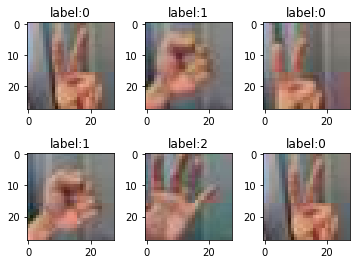

In [30]:
# testset의 data와 label이 잘 match가 되었나 확인
for i in range(1,7):
    plt.subplot(2, 3, i)
    plt.subplots_adjust(hspace=0.5)
    rannum = random.randrange(300)
    plt.imshow(x_test[rannum])
    plt.title('label:' + str(y_test[rannum]))

**-> 각 사진이 가위 라벨인 2로 맞게 출력되는 것을 확인할 수 있습니다. Train dataset에서는 학습을 위하여 다양한 사람의 손모양 data를 넣었습니다.**

## 02. Model 설계

In [6]:
# Sequential를 활용한 model 설계
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

## 03. Model 학습

In [7]:
# model.compile()과 model.fit()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=15)

Epoch 1/15
38/38 [==============================] - 1s 22ms/step - loss: 1.0327 - accuracy: 0.5042
Epoch 2/15
38/38 [==============================] - 1s 23ms/step - loss: 0.7624 - accuracy: 0.6642
Epoch 3/15
38/38 [==============================] - 1s 23ms/step - loss: 0.6083 - accuracy: 0.7583
Epoch 4/15
38/38 [==============================] - 1s 23ms/step - loss: 0.4827 - accuracy: 0.8192
Epoch 5/15
38/38 [==============================] - 1s 23ms/step - loss: 0.4008 - accuracy: 0.8408
Epoch 6/15
38/38 [==============================] - 1s 23ms/step - loss: 0.3400 - accuracy: 0.8700
Epoch 7/15
38/38 [==============================] - 1s 23ms/step - loss: 0.2822 - accuracy: 0.9058
Epoch 8/15
38/38 [==============================] - 1s 22ms/step - loss: 0.2411 - accuracy: 0.9292
Epoch 9/15
38/38 [==============================] - 1s 23ms/step - loss: 0.2201 - accuracy: 0.9275
Epoch 10/15
38/38 [==============================] - 1s 22ms/step - loss: 0.1719 - accuracy: 0.9517
Epoch 11/

**-> 자체 data로 진행했을 때는 비슷한 유형의 사진이 많아 높은 accurancy가 보인다.**

## 04. Model 평가

In [8]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.8292 - accuracy: 0.7533
test_loss: 0.8292120099067688 
test_accuracy: 0.753333330154419


예측확률분포: [0.00200552 0.0135484  0.9844461 ]
라벨: 바위, 예측결과: 보


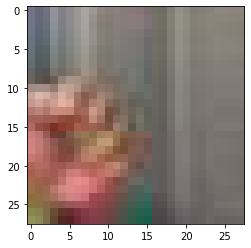

예측확률분포: [0.04318455 0.5045087  0.45230678]
라벨: 보, 예측결과: 바위


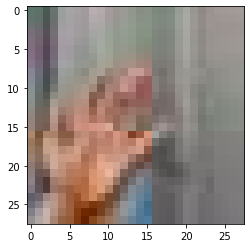

예측확률분포: [0.32251868 0.030132   0.6473493 ]
라벨: 가위, 예측결과: 보


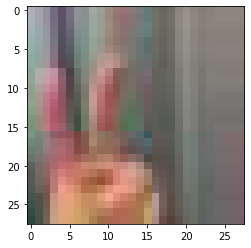

예측확률분포: [0.02792997 0.15435252 0.8177175 ]
라벨: 바위, 예측결과: 보


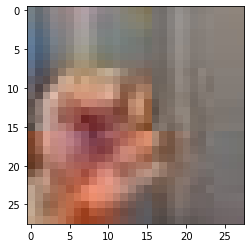

예측확률분포: [0.00203125 0.03635903 0.9616097 ]
라벨: 가위, 예측결과: 보


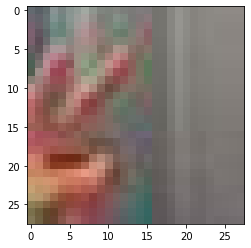

In [9]:
import random
wrong_predict_list=[]
answer_list = ['가위','바위','보']
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + answer_list[y_test[n]] + ", 예측결과: " + answer_list[predicted_labels[n]])
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [10]:
# 정확도 분석
from sklearn.metrics import classification_report# 정확도를 다양하게 분석하여 report

print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75       100
           1       0.90      0.73      0.81       100
           2       0.58      0.93      0.72       100

    accuracy                           0.75       300
   macro avg       0.83      0.75      0.76       300
weighted avg       0.83      0.75      0.76       300



**-> 랜덤으로 틀린것을 뽑았을 때 바위와 보로 예측을 많이했던 것을 볼 수 있다. 전체적인 측면에서 보았을 때 바위가 가장 높은 정확도를 보여준다.**

## 05. 회고

### epoch
> - overfitting
    - epoch 값을 크게 해줄수록 좋은 것인줄 알고 계속 크게해주다가 어느 시점이 지나면 오히려 결과값이 안좋아지는 것을 확인할 수 있었다. traindata에 overfitting된다는 것이 무엇인지 알 수 있는 시간이었다.
    - 그렇다고해서 epoch값이 작으면 또 잘 학습이 되지않았다. 95퍼센트 정도로 accurancy를 내는 epoch값이 괜찮은 결과를 보여줬고 data값이 늘어날때마다 이정도의 값이 나오도록 epoch를 돌렸다. 너무 학습하면 오히려 능률이 떨어지고 적당히 학습해야 능률이 올라가는 deep learning이 재밌었다. 나도 너무 힘주면서 살아가지는 말자는 교훈(?)을 얻었다..ㅋㅋ

### dataset
> - 많은 data가 필요함. data를 늘릴 수록 정확도가 올라갔음.
    - 한 사람의 손모양이 아니라 다양한 사람의 손모양을 같이 학습시켰을 때 정확도가 올라갔다.
    - data를 관리하는 과정에서 paper와 rock을 잘못넣어주어 고생을 많이 하였다. 컴퓨터는 정직했다. 
> - pixel값이 많이 깨짐. 28 X 28로 변환된 data를 봤을 때 많이 뭉그러져있었다. 특징을 찾아가기 어려울 것으로 판단이 되었다. 좀더 높은 해상도에서 진행할 수 있는 CV 모델을 배우고 싶었다. 
> - train set에서  test set에 있는 data를 한개라도 갖지 않을 때 정확도가 상당히 낮은 수준을 보였다. 배경에도 영향을 받는 것 같았다. test set 중 10개의 data 정도를 train data에 넣어주니 model의 accurancy가 올라갔다.

### classification_report
> - 랜덤으로 틀린 값을 봤을 때 주로 바위와 보로 잘못 예상한 값들이 많았다.
가위와 보는 precision과 recall이 서로 가장 높거나 낮다. 이중 보가 recall이 높은 것을 미뤄보았을 때 만든 model이 보로 예측할 때가 더 많다는 것을 의미한다. pixel이 많이 깨져 사람의 육안으로 보았을 때에도 주먹과 가위가 보로 보일 때도 많았다. 보가 3가지 data set중에서 가장 특징이 없어서 그런 것은 아닐까 예상했다. 또한 가위는 손동작이 2가지가 나와서 더 예측하기 힘들었던 것 같다.
바위가 가장 높은 정확도를 보여줬다. 바위는 명확하게 손가락이 없고 상하좌우 비슷하지만 바위나 가위는 손가락의 개수나 방향을 햇갈렸다고 예상할 수 있다